<hr>

# Image classification using clustering

In this notebook we will explore:

1. K-Means for image classification.
2. Cluster number optimization.
3. A prediction example.

__Source__: https://medium.com/@joel_34096/k-means-clustering-for-image-classification-a648f28bdc47 

<hr>

# 1. K-Means for image classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


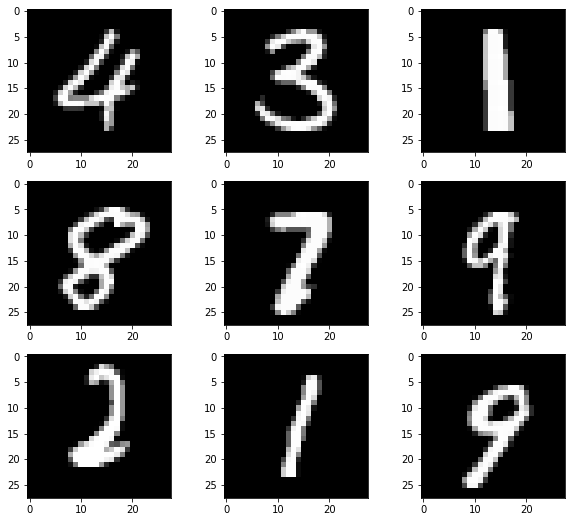

In [3]:
plt.figure(figsize = (10,9))

for i in range(9):
 plt.subplot(3,3,i+1)
 random_index = np.random.randint(len(x_train))
 plt.imshow(x_train[random_index], cmap='gray')

In [4]:
print(np.min(x_train[0]))
print(np.max(x_train[0]))

print(x_train[0].shape)

0
255
(28, 28)


In [5]:
# PRE-PROCESSING V1.0

# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print(np.min(x_train[0]))
print(np.max(x_train[0]))

0.0
1.0


In [7]:
# PRE-PROCESSING V2.0

print("Image shape", x_train.shape)

# Feature space: pixels
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

print("Per-pixel feature: ", X_train.shape)

Image shape (60000, 28, 28)
Per-pixel feature:  (60000, 784)


In [8]:
from sklearn.cluster import MiniBatchKMeans

n_classes = len(np.unique(y_train)) # n_clusters will be equal to the number of classes on the supervised dataset
print("Number of clusters: ", n_classes)

# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = n_classes)

# Fitting the model to training set
kmeans.fit(X_train)

Number of clusters:  10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [23]:
len(kmeans.labels_)
index = np.where(kmeans.labels_ == 1,1,0)
index

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
num=np.bincount(y_train[index==1])
num

array([  14, 6368,  592,  270,  125,  618,  215,  298,  544,  133])

In [9]:
def retrieve_info(cluster_labels,y_train):
  """
  Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label.
  """
  reference_labels = {}

  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num

  return reference_labels

In [27]:
reference_labels = retrieve_info(kmeans.labels_,y_train)

number_labels = np.random.rand(len(kmeans.labels_))
len(number_labels)
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [26]:
print(reference_labels)

{0: 7, 1: 1, 2: 0, 3: 3, 4: 2, 5: 4, 6: 6, 7: 8, 8: 6, 9: 7}


In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(number_labels,y_train))

0.54185


<hr>

# 2. Clusters optimization



In [33]:
def calculate_metrics(model,output):
  print("Number of clusters is {}".format(model.n_clusters))
  print("Inertia : {}".format(model.inertia_)) #SSE
  print("Homogeneity :       {}".format(metrics.homogeneity_score(output,model.labels_))) # each cluster contains only members of a single class

In [34]:
from sklearn import metrics

cluster_number = [10,16,36,64,144,256] #GRID-SEARCH

for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  
  # Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i)

  # Fitting the model to training set
  kmeans.fit(X_train)
  
  # Calculating the metrics
  calculate_metrics(kmeans,y_train)
  
  # Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_,y_train)

  # ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))

  for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
 
  print("Accuracy score : {}".format(accuracy_score(number_labels,y_train)))
  print("\n")

Number of clusters is 10
Inertia : 2377705.0
Homogeneity :       0.49323271230024385
Accuracy score : 0.61135


Number of clusters is 16
Inertia : 2215142.75
Homogeneity :       0.558569573714506
Accuracy score : 0.6386333333333334


Number of clusters is 36
Inertia : 1961942.0
Homogeneity :       0.6820209821981174
Accuracy score : 0.7521833333333333


Number of clusters is 64
Inertia : 1813400.0
Homogeneity :       0.7442900151941992
Accuracy score : 0.8089666666666666


Number of clusters is 144
Inertia : 1629911.75
Homogeneity :       0.8113319812380783
Accuracy score : 0.8826166666666667


Number of clusters is 256
Inertia : 1517364.5
Homogeneity :       0.8397488222902815
Accuracy score : 0.8971833333333333




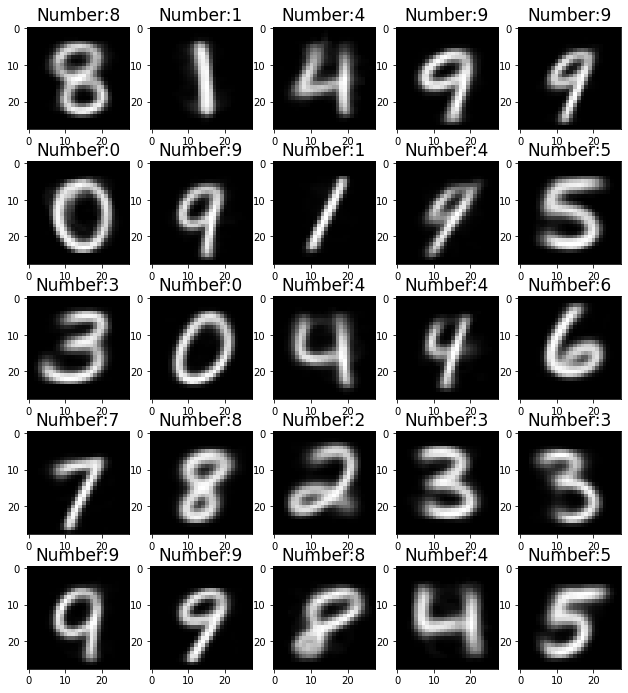

In [37]:
# Central images of each clusters
centroids = kmeans.cluster_centers_
# Reshape to original shape (256 clusters and 28x28 images)
centroids = centroids.reshape(256,28,28)
centroids.shape
centroids = centroids * 255

# # Lets plot 25 clusters from 256
plt.figure(figsize = (15,12))
bottom = 0.35
for i in range(25):
  plt.subplots_adjust(bottom)
  plt.subplot(5,5,i+1)
  plt.title("Number:{}".format(reference_labels[i]),fontsize = 17)
  plt.imshow(centroids[i], cmap = "gray")

<hr>

# 3. A prediction example

In [ ]:
# Executes this in order to retrain the clustering technique

"""
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

# Feature space: pixels
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

n_classes = 256 # The best number of clusters

# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = n_classes)

# Fitting the model to training set
kmeans.fit(X_train)
"""

(1, 784)

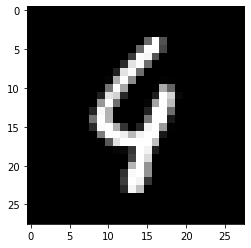

In [40]:
# Load a sample data and transforms it
# Images from dataset are normalized, so it is not required.

index = 115

image = X_test[index].reshape(1,28*28)
image = image.astype("float32")

plt.imshow(x_test[index], cmap="gray")
image.shape

In [39]:
reference_labels = retrieve_info(kmeans.labels_, y_train)
print(reference_labels)

{0: 8, 1: 1, 2: 4, 3: 9, 4: 9, 5: 0, 6: 9, 7: 1, 8: 4, 9: 5, 10: 3, 11: 0, 12: 4, 13: 4, 14: 6, 15: 7, 16: 8, 17: 2, 18: 3, 19: 3, 20: 9, 21: 9, 22: 8, 23: 4, 24: 5, 25: 8, 26: 6, 27: 7, 28: 6, 29: 0, 30: 9, 31: 2, 32: 1, 33: 3, 34: 2, 35: 0, 36: 0, 37: 0, 38: 2, 39: 7, 40: 2, 41: 4, 42: 2, 43: 1, 44: 2, 45: 7, 46: 7, 47: 7, 48: 7, 49: 2, 50: 7, 51: 2, 52: 3, 53: 4, 54: 4, 55: 2, 56: 8, 57: 0, 58: 1, 59: 1, 60: 0, 61: 6, 62: 3, 63: 0, 64: 6, 65: 9, 66: 7, 67: 3, 68: 7, 69: 8, 70: 1, 71: 8, 72: 9, 73: 6, 74: 5, 75: 3, 76: 0, 77: 0, 78: 1, 79: 0, 80: 4, 81: 5, 82: 8, 83: 9, 84: 6, 85: 9, 86: 4, 87: 3, 88: 4, 89: 2, 90: 0, 91: 6, 92: 2, 93: 4, 94: 5, 95: 7, 96: 2, 97: 4, 98: 7, 99: 7, 100: 3, 101: 8, 102: 1, 103: 5, 104: 6, 105: 5, 106: 0, 107: 9, 108: 9, 109: 2, 110: 0, 111: 4, 112: 0, 113: 8, 114: 8, 115: 5, 116: 7, 117: 2, 118: 5, 119: 0, 120: 5, 121: 8, 122: 7, 123: 2, 124: 8, 125: 6, 126: 4, 127: 2, 128: 1, 129: 2, 130: 5, 131: 1, 132: 8, 133: 6, 134: 3, 135: 9, 136: 3, 137: 6, 138: 

In [ ]:
predicted_cluster = kmeans.predict(image)
print("Predicted cluster: ", predicted_cluster)

predicted_class = reference_labels[predicted_cluster[0]]
print("Predicted class: ", predicted_class)

Predicted cluster:  [211]
Predicted class:  4


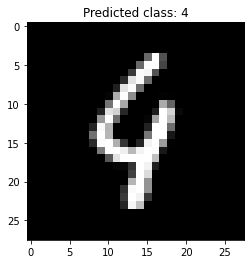

In [ ]:
plt.title("Predicted class: "+str(predicted_class))
plt.imshow(image.reshape(28,28), cmap="gray")
plt.show()

<hr>

# Lets work!

1. Try different clustering techniques over this problem, for example, mean-shift and DBScan.
2. Try to load a draw of a number a get a prediction.
3. Apply T-SNE to visualize the clusters distribution. 